In [2]:
# Import Libraries

# Core Libraries
import pandas as pd  # Data manipulation and analysis
import re  # Regular expressions for text processing
import string  # String operations
import seaborn as sns  # Visualization library
import spacy  # NLP library for advanced natural language processing
import numpy as np  # Numerical computations
from numpy import reshape  # Array reshaping utility
from num2words import num2words  # Convert numbers to words
from bs4 import BeautifulSoup  # HTML and XML parsing
from pprint import pprint  # Pretty-print data structures

# HTTP Requests
import requests  # Handling HTTP requests
from bs4 import BeautifulSoup  # Parsing HTML content
from tqdm.notebook import tqdm as tqdm  # Progress bar for loops

# JSON Handling
import json  # Work with JSON data structures

# Time and Randomization
from time import sleep  # Pause execution
import random  # Generate random numbers and sequences

# Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords  # Common stop words in English
from nltk.tokenize import word_tokenize, sent_tokenize  # Tokenization tools
from nltk.stem import PorterStemmer  # Stemming tool
import nltk  # Core NLTK library
nltk.download('punkt')  # Download tokenizer data
nltk.download('stopwords')  # Download stop words data
stop_words = stopwords.words('english')  # Initialize stop words list

# LIME (Local Interpretable Model-Agnostic Explanations)
import lime  # LIME library
from lime import lime_text  # LIME for text data
from sklearn.pipeline import make_pipeline  # Construct machine learning pipelines
from lime.lime_text import LimeTextExplainer  # LIME text explainer

# Gensim (Topic Modeling and Word Embedding)
import gensim  # Gensim library
import gensim.corpora as corpora  # Tools for creating corpora and dictionaries
from gensim.models import Word2Vec, FastText  # Word embedding models
from gensim.utils import simple_preprocess  # Preprocessing text for Gensim
from gensim.models import CoherenceModel  # Topic model coherence evaluation

# Plotting Tools
import pyLDAvis  # Visualize topic models
import pyLDAvis.gensim  # PyLDAvis support for Gensim models
import seaborn as sns  # Data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting
import plotly.graph_objects as go  # Interactive visualizations
import plotly.express as px  # Simplified plotting with Plotly
from wordcloud import WordCloud  # Generate word clouds
from mlxtend.plotting import plot_confusion_matrix  # Plot confusion matrices
%matplotlib inline  # Enable inline plotting in Jupyter

# Scikit-learn (Machine Learning)
from sklearn.model_selection import StratifiedKFold, train_test_split  # Data splitting utilities
from sklearn.preprocessing import LabelEncoder  # Encode labels as integers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # Text vectorization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics
from sklearn.svm import LinearSVC  # Support Vector Machine (SVM) classifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.model_selection import RandomizedSearchCV  # Randomized hyperparameter search
from scipy.stats import uniform  # Uniform distribution for hyperparameter search
from sklearn.manifold import TSNE  # Dimensionality reduction for visualization
from sklearn.decomposition import PCA  # Principal Component Analysis

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariachristina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariachristina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/Users/mariachristina/anaconda3/lib/python3.11/site-packages/plotly/express/imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


## Sports -  Web-scraping

In [3]:
# Initialize an empty list to store the URLs
url_list = []

# Define the main link for constructing full URLs
main_link = "https://www.sciencedaily.com"

# Define the file path where the URL list will be saved
file_path = "./files/url_list_sports.txt"

# Set the maximum number of pages to scrape
max_page = 10

# Initialize an empty list to store the URLs
url_list = []

# Define the main link for constructing full URLs
main_link = "https://www.sciencedaily.com"

# Define the file path where the URL list will be saved
file_path = "./files/url_list_sports.txt"

# Set the maximum number of pages to scrape
max_page = 10

# Loop through each page number in the range of max_page
for pg in range(max_page):
    # Construct the URL for the current page
    url = "https://www.sciencedaily.com/news/science_society/sports/#page="+ str(pg)
    print(url)  # Print the URL for debugging and progress tracking

    # Set headers to mimic a browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'
    }

    # Send an HTTP GET request to the URL
    response = requests.get(url, headers=headers, timeout=25)

    # Pause execution for a random duration between 3 and 4 seconds to avoid being blocked
    sleep(random.uniform(3, 4))

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page using BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all 'div' elements with the class 'latest-head'
        div_list = list(soup.find_all('div', class_='latest-head'))

        # Loop through each 'div' element in the list
        for div in div_list:
            try:
                # Extract the 'href' attribute of the anchor tag within the 'div'
                href = div.find('a').get('href')
                # Construct the full URL and add it to the url_list
                url_list.append(main_link + href)
            except:
                # Print an error message if 'href' is not found
                print('href not found.')
    else:
        # Print an error message if the response status code is not 200
        print("Response code not 200.")

# Write the collected URLs to the specified file
with open(file_path, "w") as f:
    for item in url_list:
        # Write each URL on a new line
        f.write(str(item) + "\n")

https://www.sciencedaily.com/news/science_society/sports/#page=0
https://www.sciencedaily.com/news/science_society/sports/#page=1
https://www.sciencedaily.com/news/science_society/sports/#page=2
https://www.sciencedaily.com/news/science_society/sports/#page=3
https://www.sciencedaily.com/news/science_society/sports/#page=4


In [90]:
# File reading and URL extraction
with open("./files/url_list_sports.txt", "r") as f:
    text = f.read()  # Read the content of the file

urls = text.splitlines()  # Split the file content into individual lines (URLs)

# Initialize an empty DataFrame to store the scraped data
df = pd.DataFrame()

# Counter to limit the number of URLs to process
counter = 0

# Loop through the URLs in the file
for url in urls:
    if counter >= 30:  # Stop processing after 30 URLs
        break

    print(counter, url)  # Print the current counter and URL for tracking

    try:
        # Set headers to mimic a browser request
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'
        }
        # Send an HTTP GET request to the URL
        response = requests.get(url, headers=headers, timeout=25)

        # Check if the response status code is 403 (Forbidden)
        if response.status_code == 403:
            print(f"403 Forbidden error for URL: {url}. Skipping this URL.")
            continue  # Skip this URL and proceed to the next one

        # Pause execution for a random duration between 3 and 4 seconds to avoid being blocked
        sleep(random.uniform(3, 4))

        # Process the response if the status code is 200 (OK)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')  # Parse the HTML content

            # Extract the title of the article
            try:
                title = soup.find('h1', class_="headline").text
            except:
                title = np.nan  # Set as NaN if not found

            # Extract the subtitle of the article
            try:
                subtitle = soup.find('h2', class_='subtitle').text
            except:
                subtitle = np.nan  # Set as NaN if not found

            # Extract the date the article was posted
            try:
                date = soup.find('dd', {'id': 'date_posted'}).text
            except:
                date = np.nan  # Set as NaN if not found

            # Extract the summary of the article
            try:
                summary = soup.find('dd', {'id': 'abstract'}).text
            except:
                summary = np.nan  # Set as NaN if not found

            # Extract the main text of the article
            try:
                # Find the first <div> with class "hyphenated underline"
                temp_text_div = soup.find_all('div', class_="hyphenate underline")

                # Ensure temp_text_div is not empty to avoid IndexError
                if temp_text_div:
                    temp_text_p_list = temp_text_div[0].find_all('p')  # Get all <p> tags within the first matching <div>

                    # Join all paragraph texts into a single string, using "\a" as a separator
                    temp_text = ' \a '.join([p.text.strip() for p in temp_text_p_list]).replace("\xa0", "")
                else:
                    temp_text = np.nan  # Set as NaN if the <div> was not found

            except (IndexError, AttributeError):
                # Handle cases where <div> or <p> tags are not found
                temp_text = np.nan

            # Create a dictionary to hold the extracted data
            temp_dict = {
                'link': url,
                'title': title,
                'subtitle': subtitle,
                'date': date,
                'summary': summary,
                'main_text': temp_text,
            }

            # Convert the dictionary into a temporary DataFrame
            temp_df = pd.DataFrame(temp_dict.values()).T
            temp_df.columns = temp_dict.keys()

            # Concatenate the temporary DataFrame with the main DataFrame
            df = pd.concat([df, temp_df], ignore_index=True)

    except Exception as e:
        # Print an error message for connection issues or other exceptions
        print(f"Connection Error or other issue for URL: {url}. Error: {str(e)}")

    # Increment the counter after processing each URL
    counter += 1

# Save the DataFrame to a CSV file
df.to_csv("./files/articles_sports.csv", index=False)

0 https://www.sciencedaily.com/releases/2024/12/241204113518.htm
1 https://www.sciencedaily.com/releases/2024/11/241121115653.htm
2 https://www.sciencedaily.com/releases/2024/11/241120122147.htm
3 https://www.sciencedaily.com/releases/2024/10/241015141618.htm
4 https://www.sciencedaily.com/releases/2024/11/241106142608.htm
5 https://www.sciencedaily.com/releases/2024/09/240917125309.htm
6 https://www.sciencedaily.com/releases/2024/09/240904184533.htm
7 https://www.sciencedaily.com/releases/2024/07/240724123110.htm
8 https://www.sciencedaily.com/releases/2024/06/240626173602.htm
9 https://www.sciencedaily.com/releases/2024/06/240627172137.htm
10 https://www.sciencedaily.com/releases/2024/06/240626151915.htm
11 https://www.sciencedaily.com/releases/2024/04/240415110530.htm
12 https://www.sciencedaily.com/releases/2024/03/240311145909.htm
13 https://www.sciencedaily.com/releases/2024/03/240305134220.htm
14 https://www.sciencedaily.com/releases/2024/11/241129120946.htm
15 https://www.scien

## Cancer - Web-scraping

In [5]:
# Initialize an empty list to store the extracted URLs
url_list = []

# Base link for constructing full URLs
main_link = "https://www.sciencedaily.com"

# File path to save the extracted URLs
file_path = "./files/url_list_cancer.txt"

# Maximum number of pages to scrape
max_page = 10

# Loop through the specified number of pages
for pg in range(max_page):
    # Construct the URL for the current page
    url = "https://www.sciencedaily.com/news/health_medicine/cancer/#page="+ str(pg)
    print(url)  # Print the URL being processed for tracking

    # Headers to mimic a browser request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'
    }

    # Send an HTTP GET request to the page
    response = requests.get(url, headers=headers, timeout=25)

    # Pause for a random duration to avoid being blocked
    sleep(random.uniform(3, 4))

    # Process the response if the status code is 200 (OK)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')  # Parse the HTML content

        # Find all <div> elements with the specified class
        div_list = list(soup.find_all('div', class_='latest-head'))

        # Extract and append href links from the div elements
        for div in div_list:
            try:
                href = div.find('a').get('href')  # Extract the href attribute
                url_list.append(main_link + href)  # Construct full URL and add to the list
            except:
                print('href not found.')  # Handle cases where href is missing
    else:
        # Print an error message if the response status code is not 200
        print("Response code not 200.")

# Save the extracted URLs to a file
with open(file_path, "w") as f:
    for item in url_list:
        f.write(str(item) + "\n")  # Write each URL on a new line

https://www.sciencedaily.com/news/health_medicine/cancer/#page=0
https://www.sciencedaily.com/news/health_medicine/cancer/#page=1
https://www.sciencedaily.com/news/health_medicine/cancer/#page=2
https://www.sciencedaily.com/news/health_medicine/cancer/#page=3
https://www.sciencedaily.com/news/health_medicine/cancer/#page=4
https://www.sciencedaily.com/news/health_medicine/cancer/#page=5
https://www.sciencedaily.com/news/health_medicine/cancer/#page=6
https://www.sciencedaily.com/news/health_medicine/cancer/#page=7
https://www.sciencedaily.com/news/health_medicine/cancer/#page=8
https://www.sciencedaily.com/news/health_medicine/cancer/#page=9


In [91]:
# Open the file containing the list of URLs and read its contents
with open("./files/url_list_cancer.txt", "r") as f:
    text = f.read()

# Split the contents of the file into a list of URLs
urls = text.splitlines()

# Initialize an empty DataFrame to store the scraped data
df = pd.DataFrame()

# Initialize a counter to limit the number of processed URLs
counter = 0

# Loop through the list of URLs
for url in urls:
    # Stop processing if the counter reaches the limit (30 URLs)
    if counter >= 30:
        break

    # Print the current counter and URL for tracking
    print(counter, url)

    try:
        # Headers to mimic a browser request
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36'
        }

        # Send an HTTP GET request to the URL
        response = requests.get(url, headers=headers, timeout=25)

        # Pause for a random duration to avoid being blocked
        sleep(random.uniform(3, 4))

        # Process the response if the status code is 200 (OK)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')  # Parse the HTML content

            # Extract the title of the article
            try:
                title = soup.find('h1', class_="headline").text
            except:
                title = np.nan

            # Extract the subtitle of the article
            try:
                subtitle = soup.find('h2', class_='subtitle').text
            except:
                subtitle = np.nan

            # Extract the publication date of the article
            try:
                date = soup.find('dd', {'id': 'date_posted'}).text
            except:
                date = np.nan

            # Extract the summary of the article
            try:
                summary = soup.find('dd', {'id': 'abstract'}).text
            except:
                summary = np.nan

            # Extract the main text of the article
            try:
                # Find the first <div> with class "hyphenate underline"
                temp_text_div = soup.find_all('div', class_="hyphenate underline")

                # Ensure temp_text_div is not empty to avoid IndexError
                if temp_text_div:
                    temp_text_p_list = temp_text_div[0].find_all('p')  # Get all <p> tags within the first matching <div>

                    # Join all paragraph texts into a single string, using "\a" as a separator
                    temp_text = ' \a '.join([p.text.strip() for p in temp_text_p_list]).replace("\xa0", "")
                else:
                    temp_text = np.nan  # Set as NaN if the <div> was not found

            except (IndexError, AttributeError):
                # Handle cases where <div> or <p> tags are not found
                temp_text = np.nan

            # Store the extracted data in a dictionary
            link = url
            temp_dict = {
                'link': link,
                'title': title,
                'subtitle': subtitle,
                'date': date,
                'summary': summary,
                'main_text': temp_text,
            }

            # Convert the dictionary to a temporary DataFrame
            temp_df = pd.DataFrame(temp_dict.values()).T
            temp_df.columns = temp_dict.keys()

            # Append the temporary DataFrame to the main DataFrame
            df = pd.concat([df, temp_df], ignore_index=True)
    except:
        # Handle connection errors and save the DataFrame to a CSV file
        print('Connection Error')
        df.to_csv('./files/articles_cancer.csv', index=False)

    # Increment the counter
    counter = counter + 1

# Save the final DataFrame to a CSV file
df.to_csv('./files/articles_cancer.csv', index=False)

0 https://www.sciencedaily.com/releases/2024/12/241210115102.htm
1 https://www.sciencedaily.com/releases/2024/12/241210114954.htm
2 https://www.sciencedaily.com/releases/2024/12/241210114948.htm
3 https://www.sciencedaily.com/releases/2024/12/241209122548.htm
4 https://www.sciencedaily.com/releases/2024/11/241128200740.htm
5 https://www.sciencedaily.com/releases/2024/12/241205142537.htm
6 https://www.sciencedaily.com/releases/2024/12/241205142530.htm
7 https://www.sciencedaily.com/releases/2024/12/241204183117.htm
8 https://www.sciencedaily.com/releases/2024/12/241206112102.htm
9 https://www.sciencedaily.com/releases/2024/12/241206002144.htm
10 https://www.sciencedaily.com/releases/2024/12/241204183132.htm
11 https://www.sciencedaily.com/releases/2024/12/241204114028.htm
12 https://www.sciencedaily.com/releases/2024/12/241205184621.htm
13 https://www.sciencedaily.com/releases/2024/12/241205184442.htm
14 https://www.sciencedaily.com/releases/2024/12/241205184439.htm
15 https://www.scien

### Loading Dataset and EDA 

In [127]:
# Read the first CSV file (articles_sports.csv)
df_sports = pd.read_csv("./files/articles_sports.csv")

# Read the second CSV file (articles_cancer.csv)
df_cancer = pd.read_csv("./files/articles_cancer.csv")

# Concatenate both DataFrames along rows (vertically)
df = pd.concat([df_sports, df_cancer], ignore_index=True)

# Display the first few rows of the concatenated DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [128]:
# Preview Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   link       60 non-null     object
 1   title      60 non-null     object
 2   subtitle   25 non-null     object
 3   date       60 non-null     object
 4   summary    60 non-null     object
 5   main_text  60 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB


### Pre-Processing

In [129]:
# Limit the DataFrame to the first 7000 rows for processing or analysis
df = df.iloc[:7000]

In [130]:
# Create raw_text column
df['raw_text'] = df['main_text']

In [131]:
# Transform the main_text to lower case letters
df['main_text'] = df['main_text'].str.lower()

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of 77 deceased male ice...   
1  in a polarized nation, there is one thing that...   
2  in cognitive science, there has recently been ...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [132]:
# Define function to remove HTML tags
def remove_html_tags(text):
    # Parse the input text using BeautifulSoup to handle HTML content
    soup = BeautifulSoup(text, "html.parser")
    
    # Extract only the text content, removing all HTML tags
    soup = soup.get_text()
    
    # Return the cleaned text without HTML tags
    return soup

In [133]:
# Remove HTML tags from dataset main_text
df['main_text'] = df['main_text'].apply(remove_html_tags)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of 77 deceased male ice...   
1  in a polarized nation, there is one thing that...   
2  in cognitive science, there has recently been ...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [134]:
# Define a function to remove URLs from the given text
def remove_urls(text):
    # Compile a regular expression pattern to match URLs (http, https, or www)
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    
    # Replace any matching URL pattern in the text with an empty string
    return url_pattern.sub('', text)

In [135]:
# Remove URLs
df['main_text'] = df['main_text'].apply(remove_urls)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of 77 deceased male ice...   
1  in a polarized nation, there is one thing that...   
2  in cognitive science, there has recently been ...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [136]:
# Define a function to remove irrelevant characters from the text
def remove_irrelevant_chars(text):
    # Use a regular expression to remove all characters except letters, digits, and whitespace
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Return the cleaned text
    return cleaned_text

In [137]:
# Remove Unwanted Characters
df['main_text'] = df['main_text'].apply(remove_irrelevant_chars)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of 77 deceased male ice...   
1  in a polarized nation there is one thing that ...   
2  in cognitive science there has recently been i...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [138]:
def remove_punctuation(text):
    cleaned_text = text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

In [139]:
# Remove Punctuation
df['main_text'] = df['main_text'].apply(remove_punctuation)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of 77 deceased male ice...   
1  in a polarized nation there is one thing that ...   
2  in cognitive science there has recently been i...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [140]:
# Define Function to remove duplicate text
def remove_duplicate_text(df):
    # Remove duplicate rows from the DataFrame
    df = df.drop_duplicates()
    # Return the DataFrame without duplicates
    return df

In [141]:
# Initial DataFrame Shape
print(df.shape)

# Remove Duplicates
df = remove_duplicate_text(df)

# Deduplicated DataFrame Shape
print(df.shape)

(60, 7)
(60, 7)


In [142]:
# Define a Function to split numbers and words in a sentence by adding a space between them
def split_number_word_in_sentence(text):
    # Check if the input is a string, if not, convert it to a string
    if not isinstance(text, str):
        text = str(text)
    
    # Define a regular expression pattern to match numbers followed by letters
    pattern = r'(\d+)([a-zA-Z]+)'
    
    # Define a function to format the matched result by adding a space between number and word
    def replace_match(match):
        return f'{match.group(1)} {match.group(2)}'
    
    # Use re.sub to apply the pattern and replace the matches using the replace_match function
    result = re.sub(pattern, replace_match, text)
    
    # Return the modified text with numbers and words separated
    return result

In [143]:
# Split numbers and words in a sentence
df['main_text'] = df['main_text'].apply(split_number_word_in_sentence)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of 77 deceased male ice...   
1  in a polarized nation there is one thing that ...   
2  in cognitive science there has recently been i...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [144]:
# Function to replace numbers in a text with their word equivalents
def replace_numbers_with_words(text):
    words = []  # Initialize an empty list to store the result
    
    # Iterate through each word in the input text
    for word in text.split():
        # Check if the word is a number
        if word.isdigit():
            # Convert the number to words and append it to the list
            words.append(num2words(int(word)))
        else:
            # If not a number, append the word as is
            words.append(word)
    
    # Join the list of words back into a single string and return it
    return ' '.join(words)

In [145]:
# Replace Numbers with Words
df['main_text'] = df['main_text'].apply(replace_numbers_with_words)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of seventy-seven deceas...   
1  in a polarized nation there is one thing that ...   
2  in cognitive science there has recently been i...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [146]:
# Function to remove words containing more than two consecutive identical characters
def remove_invalid_words(sentence):
    # Split the sentence into individual words
    words = sentence.split()
    
    # Create a list of words that do not contain more than two consecutive identical characters
    valid_words = [word for word in words if not re.search(r'(.)\1\1', word)]
    
    # Join the valid words back into a sentence and return it
    return ' '.join(valid_words)

In [147]:
# Remove Invalid Words
df['main_text'] = df['main_text'].apply(remove_invalid_words)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of seventy-seven deceas...   
1  in a polarized nation there is one thing that ...   
2  in cognitive science there has recently been i...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [148]:
# Function to clean and preprocess text data in the DataFrame
df["main_text"] = df["main_text"].str.strip()  # Remove leading and trailing whitespaces from 'main_text'

# Replace multiple consecutive spaces with a single space
df["main_text"] = df["main_text"].str.replace(r'\s+', ' ', regex=True)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of seventy-seven deceas...   
1  in a polarized nation there is one thing that ...   
2  in cognitive science there has recently been i...   
3  a recent finnish study has found that good phy...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [149]:
# Function to remove single-character words from a sentence
def remove_single_characters(sentence):
    # Split the sentence into individual words
    words = sentence.split()
    
    # Create a list of words that have more than one character
    valid_words = [word for word in words if len(word) > 1]
    
    # Join the valid words back into a sentence and return it
    return ' '.join(valid_words)

In [150]:
# Remove single characters from main_text
df['main_text'] = df['main_text'].apply(remove_single_characters)

# Preview DataFrame
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of seventy-seven deceas...   
1  in polarized nation there is one thing that ne...   
2  in cognitive science there has recently been i...   
3  recent finnish study has found that good physi...   
4  university of michigan researchers have added ...   

                                            raw_text  
0  The largest study ever of 77 deceased male ice...  
1  In a polarized nation, there is one thing that...  
2  In cognitive science, there has recently been ...  
3  A recent Finnish study has found that good phy...  
4  University of Michigan researchers have added ...

In [151]:
# spell = SpellChecker()

In [152]:
# Function to correct spelling in a given text
def correct_spelling(text):
    corrected_words = []  # List to store corrected words
    
    # Iterate through each word in the input text
    for word in text.split():
        # Use spell correction to find the most likely correct spelling of the word
        corrected_word = spell.correction(word)
        
        # If a corrected word is found, append it to the list
        if corrected_word is not None:
            corrected_words.append(corrected_word)
    
    # Join the corrected words back into a sentence and return it
    return ' '.join(corrected_words)

In [153]:
#df['Corrected_text'] = df['Text'].apply(correct_spelling)
#df.head()

In [154]:
# Set Stopwords List for English Language
stopwords_list = set(stopwords.words("english"))

# Previe Stopwords List
print(stopwords_list)

{'these', 'whom', 'both', 'and', 'themselves', 'hasn', 'an', 'yours', "aren't", "that'll", 'himself', 'but', "couldn't", "wasn't", "you're", 'his', 'is', 'herself', 'other', 'again', 'not', 'couldn', 'ourselves', 'has', 've', 'their', 'being', 'doing', 'him', 'are', 'having', 'under', 'very', 'how', 'them', 'through', 'shouldn', 'i', "wouldn't", 'with', 'those', 'd', 'so', 'into', 'when', 'am', 'any', 'y', 'as', 'at', 'during', 'haven', 'ma', "hadn't", 'then', 'wouldn', 'its', 'where', 'off', 'you', 'have', 'were', "don't", 'me', 'in', 'should', 'didn', 'be', 'had', 'below', 'don', 'above', 'theirs', 'most', 'aren', 'ain', "won't", 'than', 'does', 'our', 'he', 'after', 'too', 'the', 't', 'isn', "hasn't", 'your', "should've", 'weren', 'doesn', "haven't", 'will', 'her', 'some', 'who', 'my', 'what', 'been', 'they', 'before', 'such', 'out', 's', 'won', 'she', "shan't", "isn't", "shouldn't", 'hers', 'from', 'only', 'while', 'now', 'll', 'wasn', 'do', 'that', 'between', 'mustn', 'down', "mig

In [155]:
# Add additional stopwords to the existing set of stopwords
additional_words = [
    'the', 'of', 'and', 'to', 'in', 'that', 'for', 'is', 'we', 'this', 
    'with', 'on', 'at', 'be', 'can', 'an', 'has', 'if', 'so', 'say', 'have', 'more', 'also', 'between', 'been', 'by', ''
]
stopwords_list.update(additional_words)  # Update the stopwords list with the additional words

# Apply function to remove stopwords from 'main_text' and create a new column with the result
df["Corrected_text_without_stopwords"] = df['main_text'].apply(
    # Tokenize the text, convert words to lowercase, and filter out stopwords
    lambda x: ' '.join([word.lower() for word in word_tokenize(x) if word.lower() not in stopwords_list])
)

# Preview the first few rows of the DataFrame to check the result
df.head()

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of seventy-seven deceas...   
1  in polarized nation there is one thing that ne...   
2  in cognitive science there has recently been i...   
3  recent finnish study has found that good physi...   
4  university of michigan researchers have added ...   

                                            raw_text  \
0  The largest study ever of 77 deceased male ice...   
1  In a polarized nation, there is one thing that...   
2  In cognitive science, there has recently been ...   
3  A recent Finnish study has found that good phy...   
4  University of Michigan researchers have added ...   

                    Corrected_text_without_stopwords  
0  largest study ever seventy-seven deceased male...  
1  polarized nation one thing nearly americans ag...  
2  cognitive science recently increasing attentio...  
3  recent finnish study found good physical fitne...  
4  university michigan researchers added new dime...

In [157]:
# Convert the 'Corrected_text_without_stopwords' column to a list
text_list = list(df["Corrected_text_without_stopwords"])

# Access and display the third element in the list (index 2)
text_list[2]

'cognitive science recently increasing attention relationship sports expertise working memory however date metaanalysis compared working memory performance athletes nonathletes active mind group department psychology university jyvskyl conducted study broadly compare working memory performance two groups investigated role factors type sport performance level results working memory advantage athletes nonathletes found across different types sports performance levels interestingly advantage pronounced athletes contrasted sedentary population compared analysis sedentary population excluded nonathlete reference group doctoral researcher chenxiao wu states studies included metaanalysis wellconducted low risk bias signs publication bias findings show consistent association sports better working memory performance sedentary lifestyle appears associated poorer working memory piia astikainen associate professor leader research team says group previously studied effects aging cognitive function 

In [160]:
# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")

# Function to perform lemmatization on the input texts, filtering by allowed part-of-speech tags
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    output = []  # Initialize a list to store lemmatized words
    
    # Iterate through each sentence in the input texts
    for sent in texts:
        # Ensure the sentence is a string
        if not isinstance(sent, str):
            raise ValueError(f"Expected string, got {type(sent)}: {sent}")
        
        # Process the sentence with the spaCy NLP model
        doc = nlp(sent)
        
        # Append lemmatized tokens for the allowed parts of speech
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    
    # Return the list of lemmatized words for each sentence
    return output

# Convert 'main_text' column of the DataFrame to a list of strings
text_list = df['main_text'].apply(str).tolist()

# Apply the lemmatization function with allowed POS tags
data_lemmatized = lemmatization(text_list, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

# Print the lemmatized data
print(data_lemmatized)

[['large', 'study', 'ever', 'deceased', 'male', 'ice', 'hockey', 'player', 'find', 'odd', 'have', 'chronic', 'traumatic', 'cte', 'increase', 'year', 'play', 'national', 'player', 'have', 'neurodegenerative', 'disease', 'cause', 'repeat', 'traumatic', 'brain', 'injury', 'most', 'frequently', 'find', 'former', 'contact', 'sport', 'athlete', 'expose', 'repetitive', 'head', 'impact', 'rhi', 'many', 'perceive', 'cte', 'risk', 'limit', 'enforcer', 'study', 'make', 'clear', 'male', 'ice', 'hockey', 'player', 'risk', 'ice', 'hockey', 'player', 'long', 'career', 'only', 'more', 'likely', 'have', 'cte', 'also', 'have', 'more', 'severe', 'disease', 'explain', 'correspond', 'author', 'clinical', 'research', 'center', 'associate', 'professor', 'neurology', 'medicine', 'hope', 'datum', 'help', 'inspire', 'change', 'make', 'game', 'safe', 'as', 'well', 'help', 'former', 'ice', 'hockey', 'player', 'impact', 'cte', 'get', 'care', 'need', 'investigate', 'relationship', 'duration', 'ice', 'hockey', 'play

In [161]:
# Initialize a new column 'final_text' in the DataFrame to store the lemmatized text
df['final_text'] = ''

# Iterate through each index in the text list
for i in range(len(text_list)):
    # Assign the lemmatized words (from data_lemmatized) back to the 'final_text' column
    df['final_text'].iloc[i] = " ".join(data_lemmatized[i])

# Preview the first few rows of the DataFrame to check the result
df.head()

/var/folders/m3/v0klfhrx4kz8ghpcj_k__8180000gn/T/ipykernel_2806/1091622629.py:4: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/m3/v0klfhrx4kz8ghpcj_k__8180000gn/T/ipykernel_2806/1091622629.py:4: FutureWarning:

ChainedAssignment

link  \
0  https://www.sciencedaily.com/releases/2024/12/...   
1  https://www.sciencedaily.com/releases/2024/11/...   
2  https://www.sciencedaily.com/releases/2024/11/...   
3  https://www.sciencedaily.com/releases/2024/10/...   
4  https://www.sciencedaily.com/releases/2024/11/...   

                                               title  \
0  Largest study of CTE in male ice hockey player...   
1  Here's something Americans agree on: Sports bu...   
2  Athletes have significantly better working mem...   
3  Good physical fitness from childhood protects ...   
4  'Shallow' sports and 'deep' social hierarchies...   

                                            subtitle               date  \
0  18 of 19 NHL players had CTE, but zero of 6 wh...   December 4, 2024   
1  Belief in the 'Great Sport Myth' may be proble...  November 21, 2024   
2                                                NaN  November 20, 2024   
3                                                NaN   October 15, 2024   
4                                                NaN   November 7, 2024   

                                             summary  \
0  A large study, of 77 deceased male ice hockey ...   
1  In a polarized nation, there is one thing that...   
2  A recently published meta-analysis reveals an ...   
3  A recent study found that good physical fitnes...   
4  Researchers have added a new dimension to the ...   

                                           main_text  \
0  the largest study ever of seventy-seven deceas...   
1  in polarized nation there is one thing that ne...   
2  in cognitive science there has recently been i...   
3  recent finnish study has found that good physi...   
4  university of michigan researchers have added ...   

                                            raw_text  \
0  The largest study ever of 77 deceased male ice...   
1  In a polarized nation, there is one thing that...   
2  In cognitive science, there has recently been ...   
3  A recent Finnish study has found that good phy...   
4  University of Michigan researchers have added ...   

                    Corrected_text_without_stopwords  \
0  largest study ever seventy-seven deceased male...   
1  polarized nation one thing nearly americans ag...   
2  cognitive science recently increasing attentio...   
3  recent finnish study found good physical fitne...   
4  university michigan researchers added new dime...   

                                          final_text  
0  large study ever deceased male ice hockey play...  
1  polarize nation be thing nearly agree accord r...  
2  cognitive science recently increase attention ...  
3  recent finnish study find good physical fitnes...  
4  researcher add new dimension mathematic use pr...

In [162]:
# Remove leading and trailing spaces from the 'final_text' column
df['final_text'] = df['final_text'].apply(lambda x: x.strip())

In [163]:
# Initialize the TfidfVectorizer object to convert text data into TF-IDF features
vect = TfidfVectorizer()

In [164]:
# Apply the TfidfVectorizer to the 'main_text' column of the DataFrame
tfidf_vectors = vect.fit_transform(df['main_text'])

In [165]:
# Convert the sparse matrix of TF-IDF vectors into a DataFrame for easier manipulation
tfidf_df = pd.DataFrame.sparse.from_spmatrix(tfidf_vectors, columns=vect.get_feature_names_out())

In [166]:
# Display the first 5 rows of the TF-IDF DataFrame
tfidf_df.head(5)

a1  abboud  abdomen  abilities  ability  able  ablebodied  abnormal  \
0   0       0        0          0        0     0           0         0   
1   0       0        0          0        0     0           0         0   
2   0       0        0          0        0     0           0         0   
3   0       0        0          0        0     0           0         0   
4   0       0        0   0.042106        0     0           0         0   

   abnormalities     about  ...  zelek  zephyr  zeta  zhuang  zia  zip  zone  \
0              0   0.01259  ...      0       0     0       0    0    0     0   
1              0  0.063653  ...      0       0     0       0    0    0     0   
2              0         0  ...      0       0     0       0    0    0     0   
3              0  0.014452  ...      0       0     0       0    0    0     0   
4              0         0  ...      0       0     0       0    0    0     0   

   zones  zoomed  zoomx  
0      0       0      0  
1      0       0      0  
2      0       0      0  
3      0       0      0  
4      0       0      0  

[5 rows x 5369 columns]

In [167]:
# Initialize the CountVectorizer to extract unigrams and bigrams with a maximum of 1000 features
vect_grams = CountVectorizer(ngram_range=(1, 2), max_features=1000)

In [168]:
# Function to tokenize a list of sentences into words
def tokenize_words(sentences):
    tokenized_sentences = []  # Initialize a list to store tokenized sentences
    
    # Iterate through each sentence in the input list
    for sentence in sentences:
        # Ensure the sentence is a string
        if isinstance(sentence, str):
            # Tokenize the sentence (assuming tokenize_sentence is defined elsewhere)
            tokenized_sentence = tokenize_sentence(sentence)
            # Append the tokenized sentence to the list
            tokenized_sentences.append(tokenized_sentence)
    
    # Return the list of tokenized sentences
    return tokenized_sentences

In [169]:
# Function to tokenize a sentence into individual words (tokens)
def tokenize_sentence(sentence):
    # Split the sentence into a list of tokens (words) based on whitespace
    tokens = sentence.split()
    # Return the list of tokens
    return tokens

In [170]:
# Apply the tokenize_sentence function to the 'main_text' column to create word tokens
df['word_tokens'] = df['main_text'].apply(tokenize_sentence)

# Preview the last few rows of the DataFrame to check the result
df.tail()

link  \
55  https://www.sciencedaily.com/releases/2024/12/...   
56  https://www.sciencedaily.com/releases/2024/12/...   
57  https://www.sciencedaily.com/releases/2024/12/...   
58  https://www.sciencedaily.com/releases/2024/12/...   
59  https://www.sciencedaily.com/releases/2024/12/...   

                                                title  \
55  DNA secreted by tumor cell extracellular vesic...   
56  Largest-ever exome study offers blueprint for ...   
57  Immune T cells become exhausted in chronic fat...   
58  Researchers design novel immunotherapy for bra...   
59                         Gluing treatment to cancer   

                                             subtitle              date  \
55                                                NaN  December 3, 2024   
56                                                NaN  December 3, 2024   
57                                                NaN  December 3, 2024   
58  Trispecific design controls glioblastoma tumor...  December 3, 2024   
59  Adding PVA to a 'useless' drug leads to strong...  December 3, 2024   

                                              summary  \
55  Specially packaged DNA secreted by tumor cells...   
56  Scientists have achieved a significant milesto...   
57  Chronic fatigue syndrome creates conditions wh...   
58  Scientists created a new therapeutic design fo...   
59  Treatment for more advanced and difficult-to-t...   

                                            main_text  \
55  specially packaged dna secreted by tumor cells...   
56  mayo clinics center for individualized medicin...   
57  chronic fatigue syndrome creates conditions wh...   
58  the wistar institutes david weiner phd executi...   
59  treatment for more advanced and difficulttotre...   

                                             raw_text  \
55  Specially packaged DNA secreted by tumor cells...   
56  Mayo Clinic's Center for Individualized Medici...   
57  Chronic fatigue syndrome creates conditions wh...   
58  The Wistar Institute's David B. Weiner, Ph.D. ...   
59  Treatment for more advanced and difficult-to-t...   

                     Corrected_text_without_stopwords  \
55  specially packaged dna secreted tumor cells tr...   
56  mayo clinics center individualized medicine ac...   
57  chronic fatigue syndrome creates conditions pa...   
58  wistar institutes david weiner phd executive v...   
59  treatment advanced difficulttotreat head neck ...   

                                           final_text  \
55  specially package dna secrete tumor cell trigg...   
56  clinic individualized medicine achieve signifi...   
57  chronic fatigue syndrome create condition path...   
58  executive vice president director vaccine immu...   
59  treatment more advanced difficulttotreat head ...   

                                          word_tokens  
55  [specially, packaged, dna, secreted, by, tumor...  
56  [mayo, clinics, center, for, individualized, m...  
57  [chronic, fatigue, syndrome, creates, conditio...  
58  [the, wistar, institutes, david, weiner, phd, ...  
59  [treatment, for, more, advanced, and, difficul...

In [171]:
# Convert the 'word_tokens' column from the DataFrame into a list of tokenized sentences (corpus)
corpus = df['word_tokens'].tolist()

# Display the list of tokenized sentences (corpus)
corpus

[['the',
  'largest',
  'study',
  'ever',
  'of',
  'seventy-seven',
  'deceased',
  'male',
  'ice',
  'hockey',
  'players',
  'by',
  'the',
  'boston',
  'university',
  'cte',
  'center',
  'found',
  'that',
  'the',
  'odds',
  'of',
  'having',
  'chronic',
  'traumatic',
  'encephalopathy',
  'cte',
  'increased',
  'by',
  'thirty-four',
  'each',
  'year',
  'played',
  'and',
  'eighteen',
  'of',
  'nineteen',
  'national',
  'hockey',
  'league',
  'players',
  'had',
  'cte',
  'cte',
  'is',
  'neurodegenerative',
  'disease',
  'caused',
  'by',
  'repeated',
  'traumatic',
  'brain',
  'injuries',
  'and',
  'most',
  'frequently',
  'found',
  'in',
  'former',
  'contact',
  'sport',
  'athletes',
  'exposed',
  'to',
  'repetitive',
  'head',
  'impacts',
  'rhi',
  'while',
  'many',
  'perceive',
  'cte',
  'risk',
  'as',
  'limited',
  'to',
  'enforcers',
  'this',
  'study',
  'makes',
  'it',
  'clear',
  'that',
  'all',
  'male',
  'ice',
  'hockey',
  'p

In [172]:
# Initialize the Word2Vec model with the given parameters
w2v = Word2Vec(sentences=corpus,  # The input corpus of sentences for training
               vector_size=100,   # The size of the word vectors (dimensions)
               min_count=1,       # Minimum count of words to consider for training
               epochs=100)        # Number of training iterations (epochs)

# Print the trained Word2Vec model
print(w2v)

Word2Vec<vocab=5422, vector_size=100, alpha=0.025>


In [173]:
# Retrieve the first 100 words from the trained Word2Vec model's vocabulary
words = list(w2v.wv.key_to_index)[:100]  # Extracting the first 100 words

# Print the list of the first 100 words
print(words)

['the', 'of', 'and', 'to', 'in', 'that', 'for', 'is', 'cancer', 'this', 'with', 'are', 'as', 'from', 'study', 'sports', 'by', 'at', 'on', 'it', 'their', 'have', 'they', 'be', 'cells', 'said', 'more', 'can', 'or', 'one', 'were', 'not', 'researchers', 'these', 'we', 'was', 'an', 'two', 'research', 'but', 'which', 'also', 'new', 'health', 'athletes', 'hundred', 'who', 'patients', 'found', 'thousand', 'university', 'has', 'than', 'could', 'data', 'how', 'about', 'treatment', 'sport', 'other', 'most', 'such', 'professor', 'all', 'between', 'when', 'different', 'risk', 'dr', 'team', 'may', 'been', 'its', 'school', 'if', 'those', 'our', 'breast', 'says', 'will', 'results', 'out', 'author', 'time', 'women', 'cancers', 'many', 'help', 'immune', 'physical', 'play', 'players', 'pain', 'people', 'disease', 'cell', 'thousand,', 'years', 'while', 'so']


In [174]:
# Define the word to check for in the vocabulary
word = 'athletes'

# Check if the word exists in the Word2Vec model's vocabulary
if word in w2v.wv.key_to_index:
    # Retrieve the vector representation of the word
    word_vector = w2v.wv[word]
    # Print the vector for the word
    print(f"Vector for '{word}': {word_vector}")
else:
    # If the word is not in the vocabulary, print a message
    print(f"Word '{word}' not in vocabulary")

Vector for 'athletes': [-3.8503091   3.7997143  -1.0674193  -0.9216728   0.05134726  1.6837677
 -0.7666253   0.90991145  2.1307936  -3.6027856   1.2262805   0.6759387
  3.06526    -1.5702645  -0.41252983  0.585468   -2.8081734  -4.062719
  3.7379856  -0.06874377 -0.5482109   1.4614139  -3.8679879  -0.20840766
  2.8034012  -1.6245676  -0.08557025  1.8815666  -1.6847359  -6.9322557
 -3.49274    -1.1025455  -2.301564    2.1894882  -2.3226826  -1.3012928
 -2.136072   -2.1402385   3.179778   -1.0109037   3.6519203  -1.4929138
 -3.568749   -1.4152833   3.142629    0.54819566  4.9243617  -4.3693275
  0.5975525  -2.1817522  -1.4388325  -2.715802   -3.4416814   0.12584919
 -0.15116681 -2.5287752  -1.1568096  -1.8879511  -2.202716   -1.1002073
  1.3766965   0.20755836  2.0952065  -3.7221212  -2.299061    0.8406664
 -3.7219062   0.3126066   2.2297645   1.7391051   0.44157493 -1.2237762
  1.9734713   1.4839395   0.97827584  0.2744534  -3.0161786  -0.42728433
 -2.6249094   5.766595    3.1107955  -2

In [175]:
# Print the first 10 words from the Word2Vec model's vocabulary
print(list(w2v.wv.key_to_index.keys())[:10])  # Extract the first 10 keys (words) from the vocabulary

['the', 'of', 'and', 'to', 'in', 'that', 'for', 'is', 'cancer', 'this']


In [176]:
# Example usage
print(w2v.wv.key_to_index)

{'the': 0,
 'of': 1,
 'and': 2,
 'to': 3,
 'in': 4,
 'that': 5,
 'for': 6,
 'is': 7,
 'cancer': 8,
 'this': 9,
 'with': 10,
 'are': 11,
 'as': 12,
 'from': 13,
 'study': 14,
 'sports': 15,
 'by': 16,
 'at': 17,
 'on': 18,
 'it': 19,
 'their': 20,
 'have': 21,
 'they': 22,
 'be': 23,
 'cells': 24,
 'said': 25,
 'more': 26,
 'can': 27,
 'or': 28,
 'one': 29,
 'were': 30,
 'not': 31,
 'researchers': 32,
 'these': 33,
 'we': 34,
 'was': 35,
 'an': 36,
 'two': 37,
 'research': 38,
 'but': 39,
 'which': 40,
 'also': 41,
 'new': 42,
 'health': 43,
 'athletes': 44,
 'hundred': 45,
 'who': 46,
 'patients': 47,
 'found': 48,
 'thousand': 49,
 'university': 50,
 'has': 51,
 'than': 52,
 'could': 53,
 'data': 54,
 'how': 55,
 'about': 56,
 'treatment': 57,
 'sport': 58,
 'other': 59,
 'most': 60,
 'such': 61,
 'professor': 62,
 'all': 63,
 'between': 64,
 'when': 65,
 'different': 66,
 'risk': 67,
 'dr': 68,
 'team': 69,
 'may': 70,
 'been': 71,
 'its': 72,
 'school': 73,
 'if': 74,
 'those': 75,


In [177]:
# Get the top 10 most similar words to 'athletes'
similar_words = w2v.wv.most_similar('athletes', topn=10)

# Print the similar words with their similarity scores
print(similar_words)

[('peak', 0.5617696046829224),
 ('lundstrom', 0.5286865234375),
 ('swimmer', 0.47683554887771606),
 ('coaches', 0.4657898545265198),
 ('readiness', 0.46378254890441895),
 ('individuals', 0.46290111541748047),
 ('beliefs', 0.46021878719329834),
 ('committee', 0.45457252860069275),
 ('anomaly', 0.45376163721084595),
 ('compete', 0.44991448521614075)]

In [178]:
# Define two words to calculate similarity between
word1 = "olympic"
word2 = "year"

# Calculate the cosine similarity between the two words using their word vectors
similarity_score = w2v.wv.similarity(word1, word2)

# Print the similarity score between the two words
print(f"Similarity between '{word1}' and '{word2}': {similarity_score}")

Similarity between 'olympic' and 'year': 0.27453041076660156


In [179]:
# Assuming 'words' is a list of words in the vocabulary (e.g., the first 10 words)
word_vectors = w2v.wv[words]

# Print the word vectors for the given words
print(word_vectors)

array([[ 0.11623877,  0.15795623, -0.628988  , ..., -0.29693502,
        -0.10721619,  1.3548478 ],
       [-1.2054895 ,  0.9700196 ,  0.1715272 , ..., -0.36409295,
        -1.2614964 ,  0.5838857 ],
       [-0.8191535 ,  0.9336042 , -0.7153366 , ..., -0.7558439 ,
        -0.4044022 , -0.2531433 ],
       ...,
       [-0.11341822,  1.707668  , -0.87807876, ..., -1.106982  ,
        -0.6857003 , -0.01574129],
       [-1.1878994 ,  0.96432894, -1.4225316 , ...,  0.6771951 ,
        -2.5415094 , -1.5711471 ],
       [-1.5134847 ,  0.81267726,  0.7325041 , ...,  2.0239701 ,
         0.3000629 ,  0.6718543 ]], dtype=float32)

In [180]:
# Apply PCA to reduce the dimensionality of the word vectors to 2 components
pca = PCA(n_components=2)  # Specify the number of principal components (2D)
pca_scores = pca.fit_transform(word_vectors)  # Apply PCA transformation on the word vectors

In [181]:
# Apply t-SNE to reduce the dimensionality of the word vectors to 2 components
tsne = TSNE(n_components=2, random_state=0)  # Initialize t-SNE with 2D output and a fixed random seed for reproducibility
tsne_res = tsne.fit_transform(word_vectors)  # Apply t-SNE transformation on the word vectors

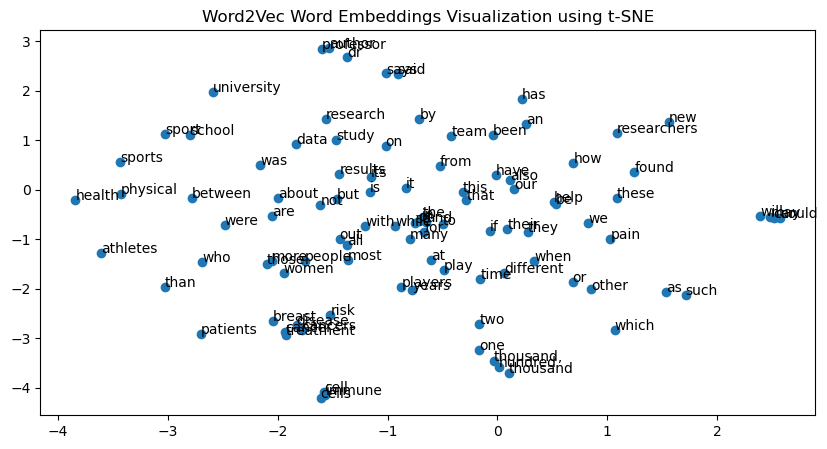

In [182]:
# Create a figure for the plot with specified size
plt.figure(figsize=(10, 5))

# Scatter plot of the t-SNE results (2D coordinates)
plt.scatter(tsne_res[:, 0], tsne_res[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    # Place the word at the coordinates (tsne_res[i, 0], tsne_res[i, 1]) in the plot
    plt.annotate(word, xy=(tsne_res[i, 0], tsne_res[i, 1]))

# Add a title to the plot
plt.title('Word2Vec Word Embeddings Visualization using t-SNE')

# Show the plot
plt.show()

In [183]:
# Create a DataFrame from the PCA results with columns for the x and y coordinates
pca_df = pd.DataFrame(pca_scores, columns=['x', 'y'])

# Add the words as a new column to the DataFrame
pca_df['word'] = words

# Display the first few rows of the DataFrame
pca_df.head()

x         y word
0 -0.728271  0.240717  the
1 -0.759002 -0.493994   of
2  0.017881 -0.114094  and
3  2.531601  0.450480   to
4 -0.661934 -0.774706   in

In [184]:
# Set the number of random values for color assignment (N should match the number of words)
N = 100000

# Create a scatter plot using Plotly's Scattergl for efficient plotting of large datasets
fig = go.Figure(data=go.Scattergl(
    x=pca_df['x'],  # x-coordinates from PCA
    y=pca_df['y'],  # y-coordinates from PCA
    mode='markers',  # Display data points as markers
    marker=dict(
        color=np.random.randn(N),  # Assign a random color to each point using a random normal distribution
        colorscale='Viridis',  # Set the color scale to 'Viridis'
        line_width=1  # Set the border width of the markers
    ),
    text=pca_df['word'],  # Add word labels as hover text
    textposition="bottom center"  # Position of the word labels relative to the points
))

# Display the plot
fig.show()

/Users/mariachristina/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/mariachristina/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



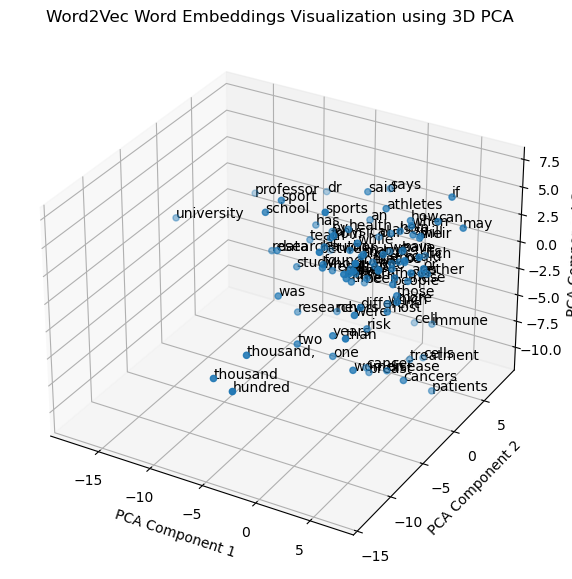

In [185]:
# Apply PCA to reduce the dimensionality of the word vectors to 3 components
pca = PCA(n_components=3)
pca_scores = pca.fit_transform(word_vectors)  # Apply PCA transformation to the word vectors

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))  # Set the figure size
ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

# Create a 3D scatter plot of the PCA-transformed word vectors
ax.scatter(pca_scores[:, 0], pca_scores[:, 1], pca_scores[:, 2])

# Annotate each point in the plot with the corresponding word
for i, word in enumerate(words):
    ax.text(pca_scores[i, 0], pca_scores[i, 1], pca_scores[i, 2], word, size=10, zorder=1, color='k')

# Set the title and axis labels for the plot
ax.set_title('Word2Vec Word Embeddings Visualization using 3D PCA')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Display the plot
plt.show()

In [186]:
# Train the Word2Vec model on a corpus of sentences
model = Word2Vec(sentences=corpus, vector_size=100, min_count=1, epochs=100)

# Extract word vectors from the model
word_vectors = model.wv

# Select the first 50 words from the vocabulary
words = list(word_vectors.index_to_key)[:50]

# Create an array of word vectors for the selected words
word_vecs = np.array([word_vectors[word] for word in words])

# Apply PCA to reduce the dimensionality of the word vectors to 3 components
pca = PCA(n_components=3)
pca_scores = pca.fit_transform(word_vecs)

# Create a DataFrame to store the PCA results and corresponding words
df_pca = pd.DataFrame(pca_scores, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['word'] = words

# Create a 3D scatter plot of the PCA results using Plotly
fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', text='word', color='PCA1',
                    title='Word2Vec Word Embeddings Visualization using 3D PCA')

# Customize the marker size and appearance
fig.update_traces(marker=dict(size=5), selector=dict(mode='markers+text'))

# Customize the layout with axis labels and margins
fig.update_layout(scene=dict(xaxis_title='PCA Component 1',
                             yaxis_title='PCA Component 2',
                             zaxis_title='PCA Component 3'),
                  margin=dict(l=0, r=0, b=0, t=40))

# Display the 3D scatter plot
fig.show()

/Users/mariachristina/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/mariachristina/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [187]:
# Preview DataFrame Columns
print(df.columns)

Index(['link', 'title', 'subtitle', 'date', 'summary', 'main_text', 'raw_text',
       'Corrected_text_without_stopwords', 'final_text', 'word_tokens'],
      dtype='object')


In [188]:
# Create a Gensim Dictionary from the lemmatized text data
id2word = corpora.Dictionary(data_lemmatized)

# Assign the lemmatized data to the 'texts' variable
texts = data_lemmatized

# Convert each document in 'texts' to its Bag-of-Words (BoW) representation
corpus = [id2word.doc2bow(text) for text in texts]

# Print the first 5 documents in the corpus
print(corpus[:5])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 15), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 3), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 5), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 4), (49, 1), (50, 1), (51, 2), (52, 1), (53, 1), (54, 1), (55, 1), (56, 2), (57, 1), (58, 1), (59, 7), (60, 2), (61, 2), (62, 1), (63, 1), (64, 9), (65, 1), (66, 10), (67, 1), (68, 5), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 3), (77, 1), (78, 1), (79, 1), (80, 1), (81, 2), (82, 3), (83, 1), (84, 1), (85, 1), (86, 3), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 2), (94, 1), (95, 2), (96, 1), (97, 1), (98, 1), (99, 1), (100, 6), (101, 13), (102, 1), (103, 1), (104, 1), (105, 3), (106, 1), (107, 1), (108, 1), (109, 1), (110,

In [189]:
# Convert the Bag-of-Words representation to actual words and frequencies for the first 5 documents
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[('account', 1),
  ('also', 1),
  ('amateur', 1),
  ('amount', 1),
  ('as', 2),
  ('associate', 1),
  ('athlete', 1),
  ('author', 1),
  ('board', 1),
  ('brain', 3),
  ('care', 1),
  ('career', 1),
  ('cause', 2),
  ('center', 1),
  ('change', 1),
  ('check', 2),
  ('chronic', 1),
  ('clear', 1),
  ('clinical', 1),
  ('college', 1),
  ('construe', 1),
  ('contact', 1),
  ('conversation', 1),
  ('correspond', 1),
  ('cte', 15),
  ('cumulative', 1),
  ('datum', 1),
  ('deceased', 1),
  ('develop', 1),
  ('diagnosis', 1),
  ('differ', 1),
  ('difference', 1),
  ('directly', 1),
  ('disease', 3),
  ('dominate', 1),
  ('donate', 1),
  ('donor', 1),
  ('doseresponse', 1),
  ('duration', 1),
  ('enforcer', 5),
  ('ever', 1),
  ('evidence', 2),
  ('explain', 1),
  ('expose', 1),
  ('factor', 1),
  ('family', 1),
  ('far', 1),
  ('female', 2),
  ('find', 4),
  ('finding', 1),
  ('football', 1),
  ('former', 2),
  ('frequency', 1),
  ('frequently', 1),
  ('game', 1),
  ('generalize', 1),
  ('g

### Unsupervised Learning 

#### Topic Modelling - LDA 

In [194]:
# Define the number of topics for the LDA model
num_topics = 10

# Train the LDA model with the given corpus and parameters
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,               # Input corpus (BoW representation)
                                           id2word=id2word,              # Dictionary to map word IDs to words
                                           num_topics=num_topics,       # Set the number of topics
                                           random_state=100,            # Set the random seed for reproducibility
                                           update_every=1,              # Update the model after every pass through the data
                                           chunksize=100,               # Process the corpus in chunks of 100 documents
                                           passes=4,                    # Number of passes through the entire corpus
                                           alpha='auto',                # Automatically adjust the alpha parameter
                                           per_word_topics=True)        # Include per-word topic distributions

In [195]:
# Print the topics generated by the LDA model
for idx, topic in lda_model.print_topics(-1):
    # Format and print each topic index along with the associated words
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.026*"compassion" + 0.019*"coach" + 0.015*"athlete" + 0.011*"sport" + 0.009*"say" + 0.008*"use" + 0.007*"more" + 0.007*"elite" + 0.007*"sporting" + 0.007*"study"


Topic: 1 
Words: 0.015*"bat" + 0.013*"study" + 0.013*"pain" + 0.010*"have" + 0.010*"say" + 0.008*"player" + 0.007*"more" + 0.007*"sport" + 0.006*"athlete" + 0.006*"well"


Topic: 2 
Words: 0.023*"cell" + 0.017*"cancer" + 0.011*"patient" + 0.010*"study" + 0.010*"treatment" + 0.009*"say" + 0.008*"more" + 0.007*"have" + 0.007*"new" + 0.006*"researcher"


Topic: 3 
Words: 0.024*"pain" + 0.021*"nerve" + 0.021*"growth" + 0.021*"factor" + 0.015*"signal" + 0.013*"nrp1" + 0.010*"researcher" + 0.010*"trka" + 0.009*"protein" + 0.008*"cell"


Topic: 4 
Words: 0.016*"team" + 0.013*"cancer" + 0.010*"play" + 0.010*"strain" + 0.010*"research" + 0.010*"say" + 0.008*"datum" + 0.008*"time" + 0.007*"game" + 0.007*"player"


Topic: 5 
Words: 0.013*"player" + 0.012*"academy" + 0.008*"professional" + 0.008*"sport" + 0.007*"league

In [196]:
# Print the perplexity score of the LDA model, which measures the model's fit to the data
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  

# Calculate and print the coherence score for the LDA model using 'c_v' coherence measure
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.395038287266198


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 


Coherence Score:  0.35317446128324625


In [197]:
# Enable the interactive visualization for Jupyter Notebooks
pyLDAvis.enable_notebook()

# Prepare the visualization for the LDA model using pyLDAvis
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Display the interactive LDA visualization
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.017143  0.112770       1        1  28.616085
2      0.083419 -0.015152       2        1  20.335292
4      0.015645  0.027520       3        1  12.301209
6      0.075312  0.009179       4        1  10.777679
8      0.072663  0.014794       5        1   8.695995
1     -0.065212  0.031511       6        1   8.215345
7      0.059483 -0.046232       7        1   5.953159
3     -0.042029 -0.130985       8        1   2.349650
0     -0.112322 -0.001472       9        1   1.798542
5     -0.069816 -0.001933      10        1   0.957044, topic_info=          Term        Freq       Total Category  logprob  loglift
131      sport  257.000000  257.000000  Default  30.0000  30.0000
2320    cancer  288.000000  288.000000  Default  29.0000  29.0000
6      athlete  112.000000  112.000000  Default  28.0000  28.0000
2422      cell  203.000000  203.000000  Default  27.0000  27.0000
1683      pain   39.000000   39.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
188      coach    0.624739   33.170228  Topic10  -5.8083   0.6770
124     school    0.699206   60.594218  Topic10  -5.6956   0.1871
128       show    0.717763   71.451158  Topic10  -5.6694   0.0484
123        say    0.779273  219.359562  Topic10  -5.5872  -0.9910
115   research    0.577133  110.367440  Topic10  -5.8875  -0.6044

[678 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
146       1  0.900900    abuse
1035     10  0.524598  academy
148       1  0.434605   accord
148       2  0.066862   accord
148       3  0.133725   accord
...     ...       ...      ...
3204      3  0.143922     zeta
3204      4  0.719610     zeta
1892      3  0.729360     zone
1892      5  0.121560     zone
1630      9  0.778563     zoom

[1454 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 5, 7, 9, 2, 8, 4, 1, 6])

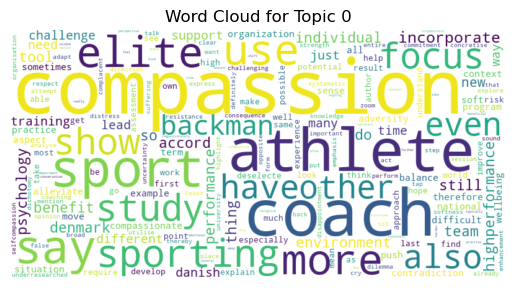

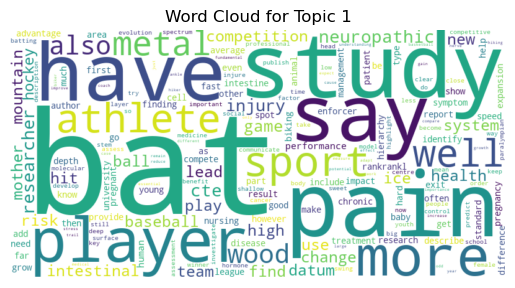

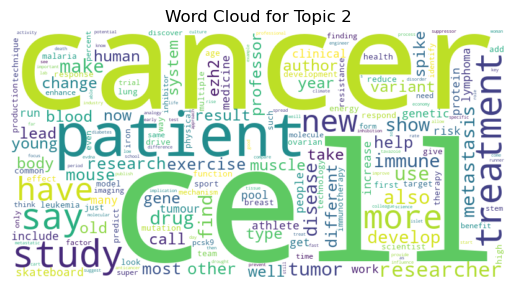

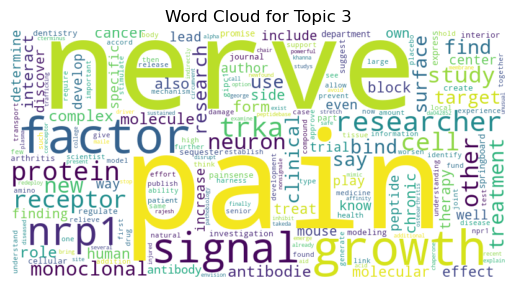

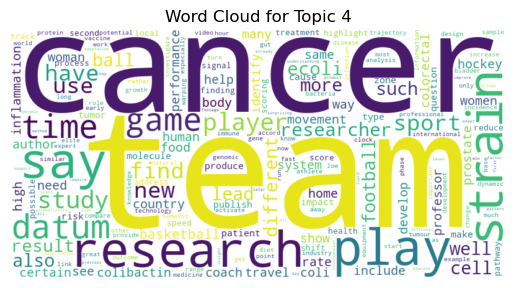

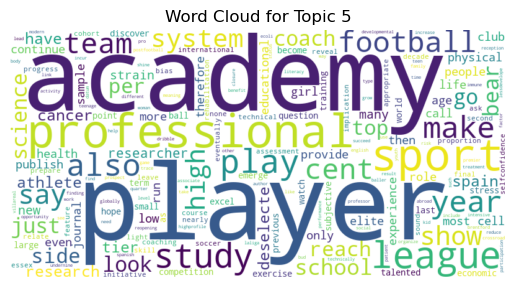

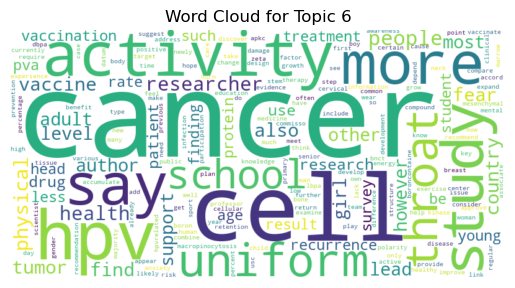

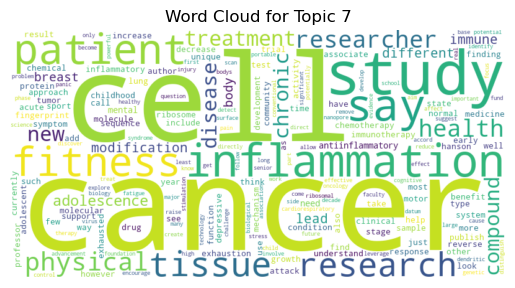

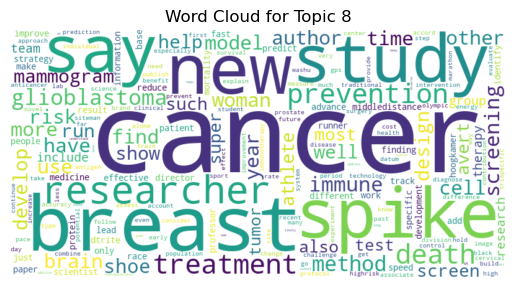

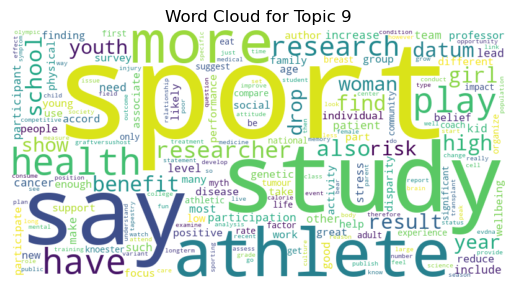

In [198]:
# Generate and display word clouds for each topic in the LDA model
for i in range(lda_model.num_topics):
    plt.figure()  # Create a new figure for each topic
    # Generate a word cloud using the top 200 words of the current topic
    wordcloud = WordCloud(background_color='white', width=800, height=400).fit_words(dict(lda_model.show_topic(i, 200)))
    # Display the word cloud image
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # Hide the axis
    plt.title(f"Word Cloud for Topic {i}")  # Set the title for the topic
    plt.show()  # Display the plot

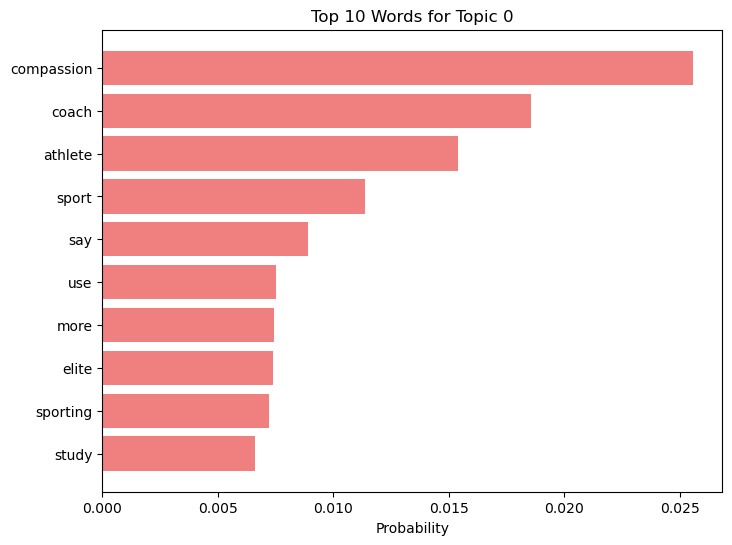

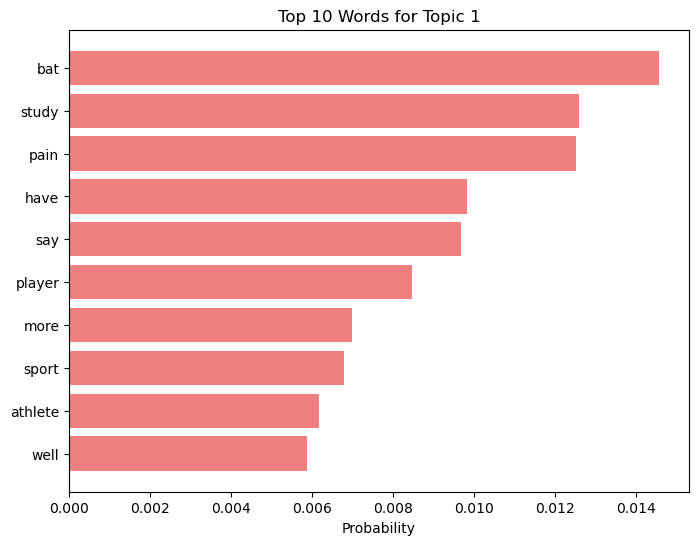

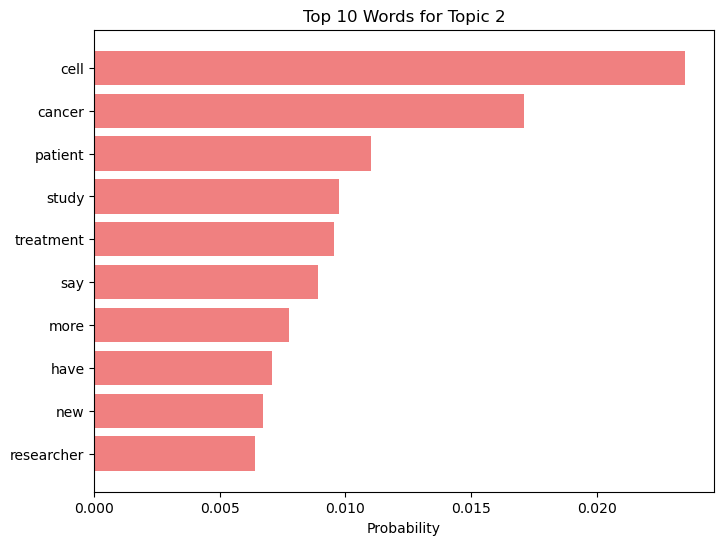

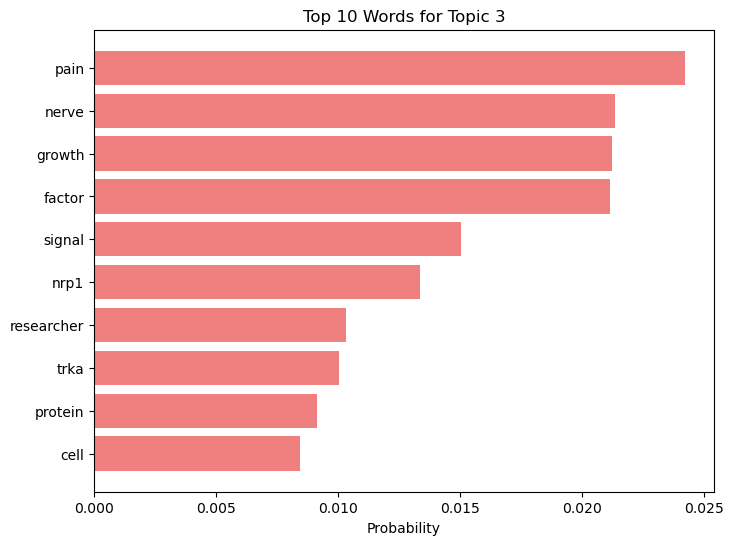

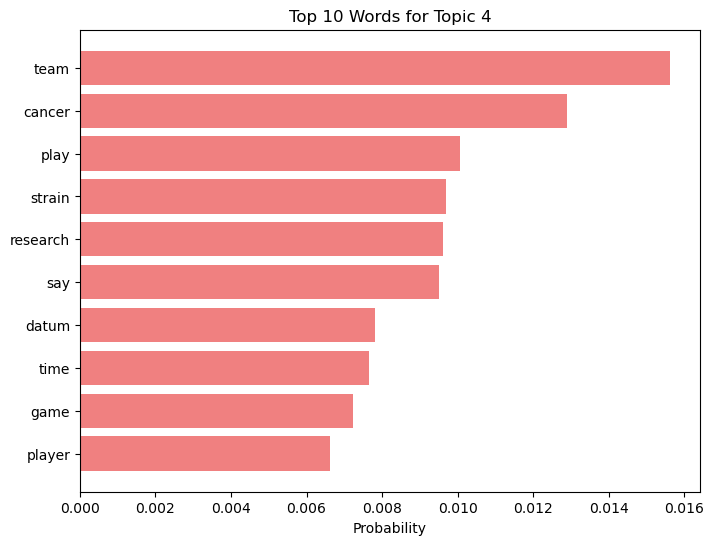

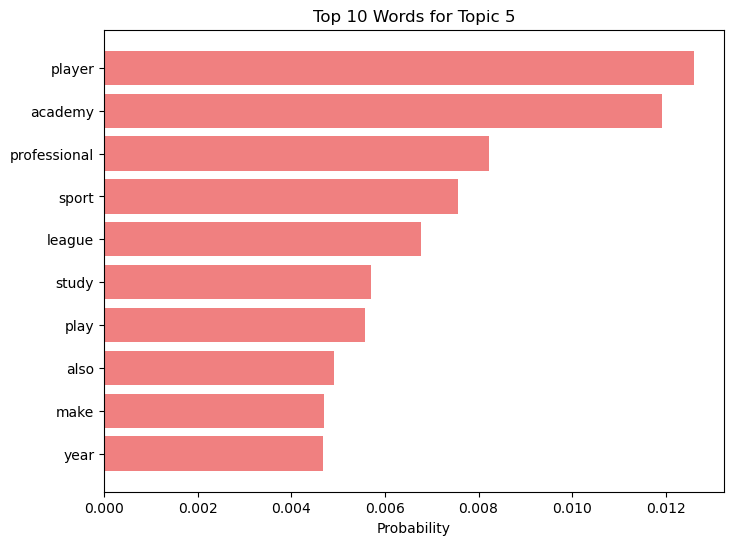

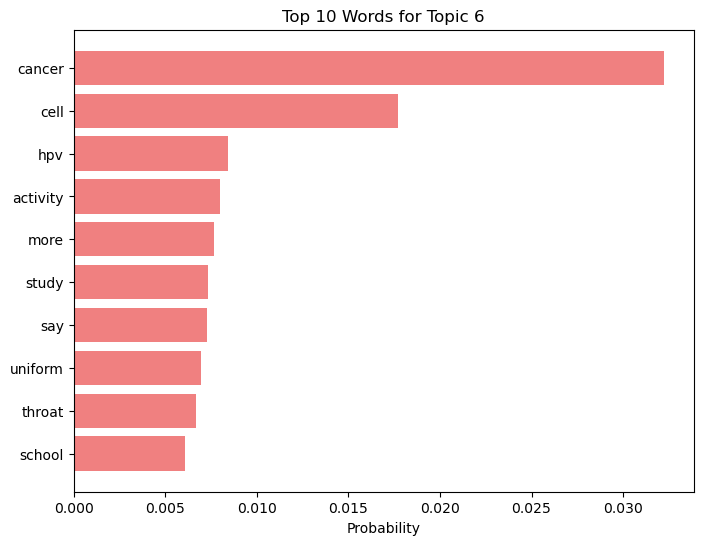

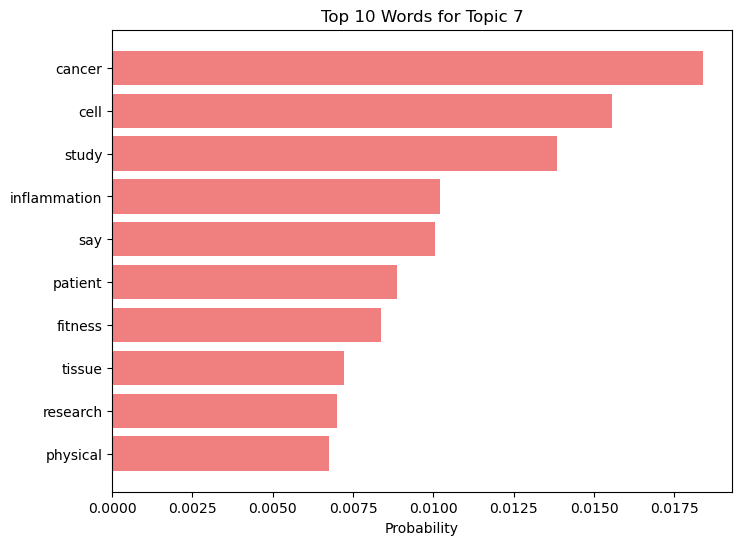

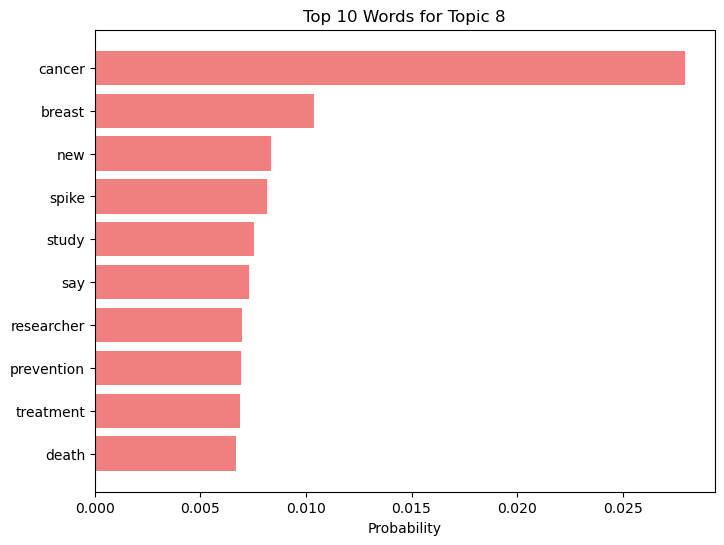

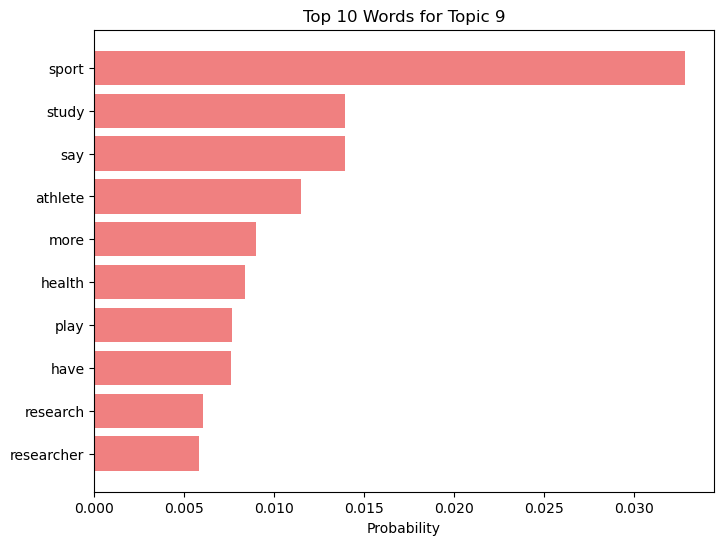

In [199]:
# Define the number of top words to display for each topic
n_top_words = 10

# Loop through all topics in the LDA model
for i in range(lda_model.num_topics):
    plt.figure(figsize=(8, 6))  # Set figure size for each topic
    # Get the top 'n_top_words' for the current topic
    top_words = lda_model.show_topic(i, n_top_words)
    words, probs = zip(*top_words)  # Unzip the words and their associated probabilities
    # Create a horizontal bar chart for the top words and their probabilities
    plt.barh(words, probs, color='lightcoral')
    plt.xlabel('Probability')  # Label for the x-axis
    plt.title(f'Top {n_top_words} Words for Topic {i}')  # Set the title for the plot
    plt.gca().invert_yaxis()  # Invert the y-axis to display the most probable words on top
    plt.show()  # Display the plot

## Chatbot

### Topic Modelling - Bertopic

In [200]:
# No need to import libraries again as they are already imported in the given list

# Ensure your dataset is loaded as a DataFrame
# Replace `df` with your actual DataFrame containing documents and links
documents = df['main_text'].tolist()
links = df['link'].tolist()

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Initialize the text-generation pipeline with an updated model
generator = pipeline("text2text-generation", model="google/flan-t5-small")

def retrieve_document(query, vectorizer, tfidf_matrix, documents, links):
    """
    Retrieve the most similar document to the query using cosine similarity.
    """
    query_vector = vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
    most_similar_index = np.argmax(cosine_similarities)
    return documents[most_similar_index], links[most_similar_index]

def generate_response(query, document, generator):
    """
    Generate a response using a text-generation model.
    """
    prompt = f"Question: {query} Answer based on the document: {document}"
    generated_answer = generator(prompt, max_length=200, num_return_sequences=1)
    return generated_answer[0]['generated_text']

def chatbot():
    """
    Interactive chatbot loop for Jupyter Notebook.
    """
    while True:
        query = input("Enter your query (or type 'exit' to quit): ")
        if query.lower() == 'exit':
            print("Goodbye!")
            break
        document, link = retrieve_document(query, vectorizer, tfidf_matrix, documents, links)
        response = generate_response(query, document, generator)
        print("\n--- Chatbot Response ---")
        print(f"Relevant Link: {link}")
        print(response)
        print("\n")

# Run the chatbot
chatbot()

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Enter your query (or type 'exit' to quit): How can athletes prevent injuries?


Token indices sequence length is longer than the specified maximum sequence length for this model (581 > 512). Running this sequence through the model will result in indexing errors



--- Chatbot Response ---
Relevant Link: https://www.sciencedaily.com/releases/2024/11/241129120946.htm
ecg screenings


Enter your query (or type 'exit' to quit): Which is the time for the detection of a brain tumor?

--- Chatbot Response ---
Relevant Link: https://www.sciencedaily.com/releases/2024/12/241205184621.htm
the technology worked in mice


Enter your query (or type 'exit' to quit): Can you tell me about a medicine for tumors?

--- Chatbot Response ---
Relevant Link: https://www.sciencedaily.com/releases/2024/12/241210115102.htm
a medicine for tumors


Enter your query (or type 'exit' to quit): which is a medicine to treat cancer?

--- Chatbot Response ---
Relevant Link: https://www.sciencedaily.com/releases/2024/12/241210115102.htm
resolution medicine


Enter your query (or type 'exit' to quit): exit
Goodbye!


_____________________________________________________________________________________